# Física Nuclear y de Partículas #

## Tema 2: La interacción nuclear. El deuterón y la interacción nucleón-nucleón ##


César Fernández Ramírez\
Departamento de Física Interdisciplinar\
Universidad Nacional de Eduación a Distancia

Versión: Junio 2024

Contenidos:

- Propiedades físicas del deuterón
- Función de onda del deuterón 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pandas as pd
import matplotlib.ticker as ticker
from scipy.optimize import fsolve
from scipy.integrate import quad

jpac_blue   = "#1F77B4"; jpac_red    = "#D61D28";
jpac_green  = "#2CA02C"; jpac_orange = "#FF7F0E";
jpac_purple = "#9467BD"; jpac_brown  = "#8C564B";
jpac_pink   = "#E377C2"; jpac_gold   = "#BCBD22";
jpac_aqua   = "#17BECF"; jpac_grey   = "#7F7F7F";

jpac_color = [jpac_blue, jpac_red, jpac_green, 
              jpac_orange, jpac_purple, jpac_brown,
              jpac_pink, jpac_gold, jpac_aqua, jpac_grey, 'black' ];

jpac_axes = jpac_color[10]
dashes = 60*'-'

# the service URL
livechart = "https://nds.iaea.org/relnsd/v1/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; \
                   Ubuntu; Linux x86_64; rv:77.0) \
                    Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

df = lc_pd_dataframe(livechart + "fields=ground_states&nuclides=all")
df = df[pd.to_numeric(df['binding'],errors='coerce').notna()]
df['binding'] /= 1000
df['A'] = df['n']+df['z']

uma = 931.4941024/1000000/1000
mproton, mneutron, mpion = 938.27208943, 939.56542052, 139.57039
fmtomev = 197.32
hbarc = 197.32


Propiedades físicas del deuterón

In [2]:
deuteron = df.loc[ ((df['z']==1) & (df['n']==1))] 
print(dashes+dashes)
print('Propiedades del deuterón:')
print(dashes+dashes)
print('A=',deuteron['A'].values[0],';','Z=',deuteron['z'].values[0],'(',deuteron['symbol'].values[0],');','N=',deuteron['n'].values[0])
print('Año de descubrimiento: ', int(deuteron['discovery'].values[0]))
print('Semivida: ', deuteron['half_life'].values[0])
print('Abundancia: ', deuteron['abundance'].values[0],'%')
print('Radio de carga: ', deuteron['radius'].values[0],'+/-',deuteron['unc_r'].values[0],'fm')
print('Energía de ligadura: ', deuteron['binding'].values[0]*deuteron['A'].values[0],'+/-',deuteron['unc_ba'].values[0]*deuteron['A'].values[0],'MeV')
print('Masa: ', deuteron['atomic_mass'].values[0]/1000,'+/-',deuteron['unc_am'].values[0]/1000,'u.m.a.',';',deuteron['atomic_mass'].values[0]*uma,'GeV')
print('Momento dipolar magnético: ', deuteron['magnetic_dipole'].values[0],'+/-',deuteron['unc_md'].values[0],'magnetones de Bohr')
print('Momento cuadrupolar eléctrico: ', deuteron['electric_quadrupole'].values[0]*1000,'+/-',deuteron['unc_eq'].values[0]*1000,'mb')
print('Energía de separación del protón:  ', deuteron['sp'].values[0]/1000,'+/-',deuteron['unc_sp'].values[0]/1000,'MeV')
print('Energía de separación del neutrón: ', deuteron['sn'].values[0]/1000,'+/-',deuteron['unc_sn'].values[0]/1000,'MeV')
print(dashes+dashes)


------------------------------------------------------------------------------------------------------------------------
Propiedades del deuterón:
------------------------------------------------------------------------------------------------------------------------
A= 2 ; Z= 1 ( H ); N= 1
Año de descubrimiento:  1932
Semivida:  STABLE
Abundancia:  0.0145 %
Radio de carga:  2.1421 +/- 0.0088 fm
Energía de ligadura:  2.2245662000000004 +/- 0.0004 MeV
Masa:  2014.1017778439998 +/- 1.5000000000000002e-08 u.m.a. ; 1.8761239276950408 GeV
Momento dipolar magnético:  0.857438231 +/- 5e-09 magnetones de Bohr
Momento cuadrupolar eléctrico:  2.8578 +/- 0.0003 mb
Energía de separación del protón:   2.2245662000000004 +/- 4.0000000000000003e-07 MeV
Energía de separación del neutrón:  2.2245662000000004 +/- 4.0000000000000003e-07 MeV
------------------------------------------------------------------------------------------------------------------------


Propiedades físicas del tritio

In [3]:
deuteron = df.loc[ ((df['z']==1) & (df['n']==2))] 
print(dashes+dashes)
print('Propiedades del tritio:')
print(dashes+dashes)
print('A=',deuteron['A'].values[0],';','Z=',deuteron['z'].values[0],'(',deuteron['symbol'].values[0],');','N=',deuteron['n'].values[0])
print('Año de descubrimiento: ', int(deuteron['discovery'].values[0]))
print('Semivida: ', deuteron['half_life'].values[0],deuteron['unit_hl'].values[0])
print('Abundancia: ', deuteron['abundance'].values[0],'%')
print('Radio de carga: ', deuteron['radius'].values[0],'+/-',deuteron['unc_r'].values[0],'fm')
print('Energía de ligadura: ', deuteron['binding'].values[0]*deuteron['A'].values[0],'+/-',deuteron['unc_ba'].values[0]*deuteron['A'].values[0],'MeV')
print('Masa: ', deuteron['atomic_mass'].values[0]/1000,'+/-',deuteron['unc_am'].values[0]/1000,'u.m.a.',';',deuteron['atomic_mass'].values[0]*uma,'GeV')
print('Momento dipolar magnético: ', deuteron['magnetic_dipole'].values[0],'+/-',deuteron['unc_md'].values[0],'magnetones de Bohr')
print('Momento cuadrupolar eléctrico: ', deuteron['electric_quadrupole'].values[0]*1000,'+/-',deuteron['unc_eq'].values[0]*1000,'mb')
print('Energía de separación del protón:  ', deuteron['sp'].values[0]/1000,'+/-',deuteron['unc_sp'].values[0]/1000,'MeV')
print('Energía de separación del neutrón: ', deuteron['sn'].values[0]/1000,'+/-',deuteron['unc_sn'].values[0]/1000,'MeV')
print(dashes+dashes)


------------------------------------------------------------------------------------------------------------------------
Propiedades del tritio:
------------------------------------------------------------------------------------------------------------------------
A= 3 ; Z= 1 ( H ); N= 2
Año de descubrimiento:  1934
Semivida:  12.32 Y
Abundancia:  nan %
Radio de carga:  1.7591 +/- 0.0363 fm
Energía de ligadura:  8.481796200000002 +/- 0.0009 MeV
Masa:  3016.04928132 +/- 8e-08 u.m.a. ; 2.8094321180973383 GeV
Momento dipolar magnético:  2.97896246 +/- 1.4e-08 magnetones de Bohr
Momento cuadrupolar eléctrico:  nan +/- nan mb
Energía de separación del protón:   nan +/- nan MeV
Energía de separación del neutrón:  6.2572301 +/- 4.0000000000000003e-07 MeV
------------------------------------------------------------------------------------------------------------------------


Función de onda del deuterón (hipótesis de esfericidad y potencial cuadrado)

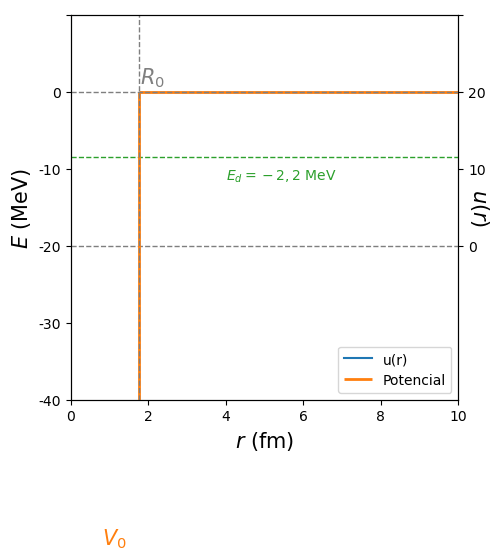

In [4]:
def k1(mu,Ed,V0):
    return np.sqrt(2*mu*(V0+Ed))
def k2(mu,Ed):
    return np.sqrt(-2*mu*Ed)

def fdowell(r0,mu,V0,Eb,r):
    Ed = - Eb
    if (r<=r0):
        return np.sin(k1(mu,Ed,V0)*r)/np.sin(k1(mu,Ed,V0)*r0)
    else:
        return np.exp(k2(mu,Ed)*r0)*np.exp(-k2(mu,Ed)*r)

def continuity(R0,Eb,mu):
    Ed = - Eb
    func = lambda V0: k2(mu,Ed)/k1(mu,Ed,V0) + 1./np.tan(k1(mu,Ed,V0)*R0)
    initial_guess = 30
    return fsolve(func, initial_guess)

def integrand(r,r0,mu,V0,Eb):
    return np.abs(fdowell(r0,mu,V0,Eb,r))**2

mu = mproton*mneutron/(mproton+mneutron)
Ed = deuteron['binding'].values[0]*deuteron['A'].values[0]
R0 = deuteron['radius'].values[0]
V0 = continuity(R0/fmtomev,Ed,mu)[0]
#print('Para R0=',R0,', V0=',V0,'MeV')
#print('R0*R0*V0=',R0*R0*V0,'MeV fm2')

r = np.linspace(0,10,1000)
I = quad(integrand, 0, 100,args=(R0/fmtomev,mu,V0,Ed))
ur = np.array([ fdowell(R0/fmtomev,mu,V0,Ed,r[i]/fmtomev)/np.sqrt(I[0]) for i in np.arange(len(r))])

fig, ax1 = plt.subplots(figsize=(5,5))
ax2 = ax1.twinx()
plt.xlim((0.,10.))
plt.ylim((-40,10.))
ax1.set_ylabel(r'$E$ (MeV)',fontsize=15)
ax1.set_xlabel(r'$r$ (fm)',fontsize=15)
ax1.set_yticks([10,0,-10,-20,-30,-40],[' ','0','-10','-20','-30','-40'])
ax2.set_yticks([10,0,-10,-20],[' ','20','10','0'])
ax2.set_ylabel(r'$u(r)$',fontsize=15, rotation=-90)
plt.plot(r,ur-20,'-',c=jpac_color[0],label='u(r)')
plt.hlines(0,R0,10,colors=jpac_color[3],  lw=2., linestyles='solid',label='Potencial')
plt.hlines(-20,0,10,colors=jpac_color[9],  lw=1., linestyles='dashed')
plt.hlines(-Ed,0,10,colors=jpac_color[2],  lw=1., linestyles='dashed')
plt.hlines(-V0,0,R0,colors=jpac_color[3], lw=2., linestyles='solid')
plt.vlines(R0,-V0,0,colors=jpac_color[3], lw=2., linestyles='solid')
plt.vlines(R0,-40,10,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines(0,0,10,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.text(0.8,-V0+1,r'$V_0$',c=jpac_color[3],fontsize=15)
plt.text(4,-Ed-3,r'$E_d=-2,2$ MeV',c=jpac_color[2],fontsize=10)
plt.text(R0+0.02,1,r'$R_0$',c=jpac_color[9],fontsize=15)
plt.legend(loc='lower right',ncol=1,frameon=True)
plt.show()    
#fig.savefig("deuteronfdo.pdf", bbox_inches='tight')


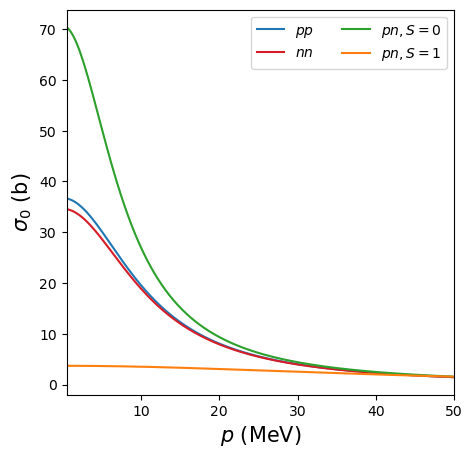

In [5]:
def xsec(a,r0,k):
    return 4.*np.pi*a*a/( (1.-a*r0*k**2/2)**2 + (a*k)**2 )

kmin, kmax, kstep = 0.5, 50, 0.01
p = np.arange(kmin,kmax,kstep)
k = p/fmtomev

fig = plt.figure(figsize=(5,5))
plt.xlim((kmin,kmax))
#plt.ylim((0.,0.2))
plt.ylabel(r'$\sigma_0$ (b)',fontsize=15)
plt.xlabel(r'$p$ (MeV)',fontsize=15)
a, r0 = -17.1, 2.794
plt.plot(p,xsec(a,r0,k)/100,'-',c=jpac_color[0],label=r'$pp$')
a, r0 = -16.6, 2.84
plt.plot(p,xsec(a,r0,k)/100,'-',c=jpac_color[1],label=r'$nn$')
a, r0 = -23.715, 2.73
plt.plot(p,xsec(a,r0,k)/100,'-',c=jpac_color[2],label=r'$pn, S=0$')
a, r0 = 5.423, 1.738
plt.plot(p,xsec(a,r0,k)/100,'-',c=jpac_color[3],label=r'$pn, S=1$')
plt.legend(loc='upper right',ncol=2,frameon=True)
plt.show()
#fig.savefig("sigmaNN.pdf", bbox_inches='tight')


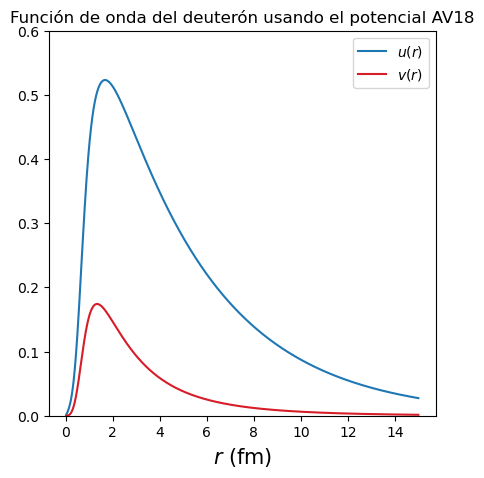

In [6]:
deuteron = np.loadtxt('deuteronAV18.txt')
fig = plt.figure(figsize=(5,5))
plt.ylim((0.,0.6))
plt.title('Función de onda del deuterón usando el potencial AV18')
plt.xlabel(r'$r$ (fm)',fontsize=15)
plt.plot(deuteron[:,0],deuteron[:,1],'-',c=jpac_color[0],label=r'$u(r)$')
plt.plot(deuteron[:,0],deuteron[:,3],'-',c=jpac_color[1],label=r'$v(r)$')
plt.legend(loc='upper right',ncol=1,frameon=True)
plt.show()